<a href="https://colab.research.google.com/github/me5m7/System-Software-lab/blob/master/Approximating_Quadratic_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Gradient Descent Optimization
This notebook demonstrates the application of the JAX library in performing simple gradient descent, which is an excellent option for deep learning research. A basic model is constructed to be trained on a small dataset that represents a quadratic function. The objective of the model is to accurately approximate the quadratic function.

In [ ]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

## Model Creation

In [ ]:
# initilize a given layer by scaling the weights according to its input and output dimensions
def init_weights(input_dims, output_dims):
  return np.random.normal(size=(input_dims, output_dims)) * np.sqrt(2/input_dims)


# create a model providing the width of each layer
def init_model(widths):
  params = []
  for input_dims, output_dims in zip(widths[:-1], widths[1:]):
    params.append(dict(weights= init_weights(input_dims, output_dims), biases=np.ones(shape=(output_dims,))))
  return params


# create the model parameters (p)
p = init_model([1, 128, 124, 1])

In [ ]:
# print the diemnsions of each layer
jax.tree_map(lambda x: x.shape, p)

# Dataset

In [ ]:
# pick random samples for the input points
xs = np.random.normal(size=(128, 1))
# apply the quadratic function and get the true output y
ys = xs ** 2


## Forward and Backward Pass

In [ ]:
# forward the input vector x throughout the parameters
def forward(p, x):
  *hidden, last = p
  for layer in hidden:
    x = jax.nn.relu(x @ layer['weights'] + layer['biases'])
  return x @ last['weights'] + last['biases']


# return the loss value given the model's parameters, the input x, and expected output y
def loss_fn(p, x, y):
  yh = forward(p, x)
  return jnp.mean((yh - y) ** 2)


# update rule of each step (below is simple gradient descent)
def update_rule(p, g):
  lr = 0.0001
  return p - lr * g

@jax.jit
def update(p, x, y):
  gradients = jax.grad(loss_fn)(p, x, y)
  # send the parameters and gradients to apply the update rule, and map the result to the parameters
  return jax.tree_map(update_rule, p, gradients)

# Training and Testing

In [ ]:
# train the model for 1000 epochs
for _ in range(1000):
  p = update(p, xs, ys)

# Now use the input points to check
plt.scatter(xs, ys)
predictions = forward(p, xs)
plt.scatter(xs, predictions, label='Model prediction')
plt.legend();

# Adam Optimiser


Update	Gradient Descent Error	Adam Error
0	3.4938			0.4227
10	0.2523			0.4264
20	0.2148			0.2404
30	0.2120			0.2440
40	0.2095			0.1978
50	0.2071			0.1885
60	0.2047			0.1782
70	0.2024			0.1678
80	0.2002			0.1584
90	0.1979			0.1495
100	0.1958			0.1412
110	0.1936			0.1334
120	0.1915			0.1261
130	0.1895			0.1192
140	0.1875			0.1128
150	0.1855			0.1066
160	0.1836			0.1007
170	0.1817			0.0947
180	0.1798			0.0886
190	0.1780			0.0825
200	0.1762			0.0768
210	0.1745			0.0714
220	0.1727			0.0663
230	0.1711			0.0615
240	0.1694			0.0570
250	0.1678			0.0527
260	0.1662			0.0485
270	0.1646			0.0442
280	0.1631			0.0397
290	0.1616			0.0349
300	0.1601			0.0312
310	0.1587			0.0281
320	0.1573			0.0252
330	0.1559			0.0227
340	0.1545			0.0204
350	0.1532			0.0184
360	0.1519			0.0166
370	0.1506			0.0149
380	0.1493			0.0135
390	0.1481			0.0122
400	0.1469			0.0111
410	0.1457			0.0101
420	0.1445			0.0092
430	0.1433			0.0084
440	0.1422			0.0077
450	0.1411			0.0070
460	0.1400			0.0064
470	0.1389			0.0059
480	0.1379

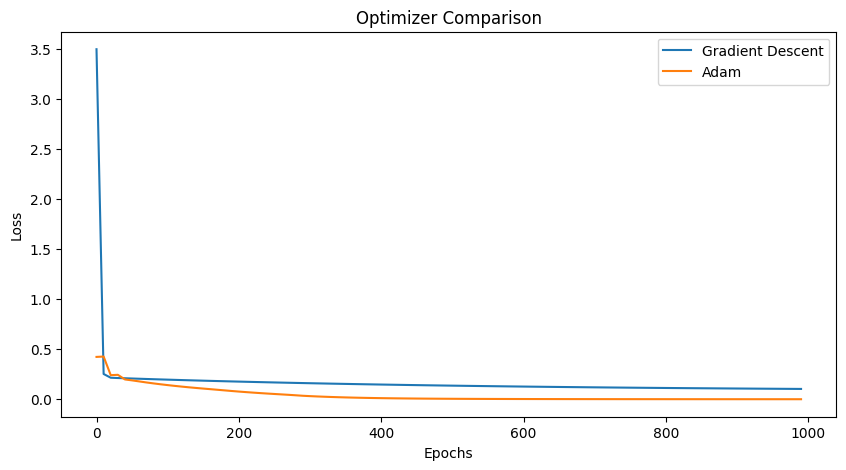

In [ ]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit

# Initialize weights and biases with He initialization for ReLU activation
def init_weights(input_dim, output_dim):
    bound = np.sqrt(6 / input_dim)
    return (np.random.uniform(-bound, bound, (input_dim, output_dim)), np.zeros(output_dim))

# Model definition with ReLU activations
def model(params, x):
    activations = x
    for w, b in params[:-1]:
        activations = jax.nn.relu(jnp.dot(activations, w) + b)
    final_w, final_b = params[-1]
    return jnp.dot(activations, final_w) + final_b

# Mean Squared Error Loss function
def mse_loss(params, x, y):
    pred = model(params, x)
    return jnp.mean((pred - y) ** 2)

# Simple Gradient Descent update function
def update_params(params, grads, lr=0.001):
    return [(w - lr * dw, b - lr * db) for (w, b), (dw, db) in zip(params, grads)]

# Adam Optimizer
def init_adam(params):
    return [(jnp.zeros_like(w), jnp.zeros_like(b)) for w, b in params], [(jnp.zeros_like(w), jnp.zeros_like(b)) for w, b in params]

def update_adam(params, grads, ms, vs, t, lr=0.001, b1=0.9, b2=0.999, eps=1e-8):
    ms_updated = []
    vs_updated = []
    params_updated = []
    for (w, b), (dw, db), (m_w, m_b), (v_w, v_b) in zip(params, grads, ms, vs):
        m_w = b1 * m_w + (1 - b1) * dw
        m_b = b1 * m_b + (1 - b1) * db
        v_w = b2 * v_w + (1 - b2) * (dw**2)
        v_b = b2 * v_b + (1 - b2) * (db**2)
        m_w_hat = m_w / (1 - b1**t)
        m_b_hat = m_b / (1 - b1**t)
        v_w_hat = v_w / (1 - b2**t)
        v_b_hat = v_b / (1 - b2**t)
        w_updated = w - lr * m_w_hat / (jnp.sqrt(v_w_hat) + eps)
        b_updated = b - lr * m_b_hat / (jnp.sqrt(v_b_hat) + eps)
        ms_updated.append((m_w, m_b))
        vs_updated.append((v_w, v_b))
        params_updated.append((w_updated, b_updated))
    return params_updated, ms_updated, vs_updated

# Generate synthetic data
xs = np.linspace(-2, 2, 128).reshape(-1, 1)
ys = xs ** 2

# Initialize parameters
layer_sizes = [1, 64, 64, 1]
params = [init_weights(layer_sizes[i], layer_sizes[i + 1]) for i in range(len(layer_sizes) - 1)]

# Train with Gradient Descent
error_values_gd = []
params_gd = params.copy()
for epoch in range(1000):
    grads = grad(mse_loss)(params_gd, xs, ys)
    params_gd = update_params(params_gd, grads, lr=0.001)
    if epoch % 10 == 0:  # Collect errors every 10 epochs
        loss = mse_loss(params_gd, xs, ys)
        error_values_gd.append(loss)

# Train with Adam Optimizer
error_values_adam = []
params_adam = params.copy()
ms, vs = init_adam(params_adam)
for epoch in range(1, 1001):
    grads = grad(mse_loss)(params_adam, xs, ys)
    params_adam, ms, vs = update_adam(params_adam, grads, ms, vs, epoch)
    if epoch % 10 == 0:  # Collect errors every 10 epochs
        loss = mse_loss(params_adam, xs, ys)
        error_values_adam.append(loss)

# Print errors every 10 updates for both optimizers
print("Update\tGradient Descent Error\tAdam Error")
for i in range(min(len(error_values_gd), len(error_values_adam))):
    print(f"{i * 10}\t{error_values_gd[i]:.4f}\t\t\t{error_values_adam[i]:.4f}")

# Optionally, you can plot the results for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1000, 10), error_values_gd, label='Gradient Descent')
plt.plot(np.arange(0, 1000, 10), error_values_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimizer Comparison')
plt.show()
